## Breast cancer prediction using Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
bc_data = pd.read_csv("breast_cancer.csv")
bc = bc_data[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "diagnosis"]]
bc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,M
1,20.57,17.77,132.90,1326.0,0.08474,M
2,19.69,21.25,130.00,1203.0,0.10960,M
3,11.42,20.38,77.58,386.1,0.14250,M
4,20.29,14.34,135.10,1297.0,0.10030,M


### EDA

- Correlation Matrix

<AxesSubplot:>

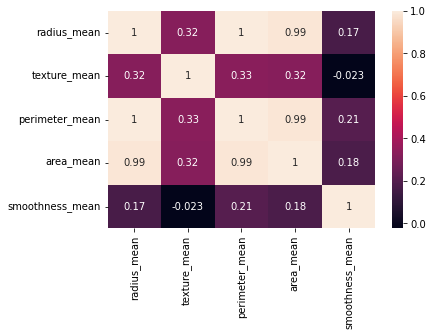

In [3]:
import seaborn as sn

correlations = bc.corr(method="pearson")
sn.heatmap(correlations, annot=True)

From correlation matrix there can be seen that few features are highly correlated (~1). We can choose one of them and drop all the others because thay don't contain any additional information.

<AxesSubplot:>

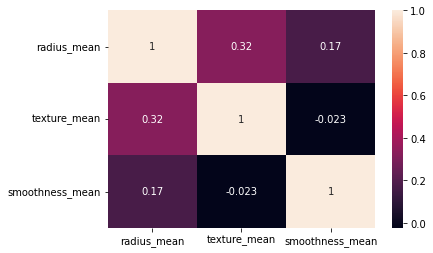

In [6]:
bc = bc.drop(["area_mean", "perimeter_mean"], axis=1)
correlations = bc.corr(method="pearson")

sn.heatmap(correlations, annot=True)

- Histograms

<AxesSubplot:xlabel='diagnosis', ylabel='Count'>

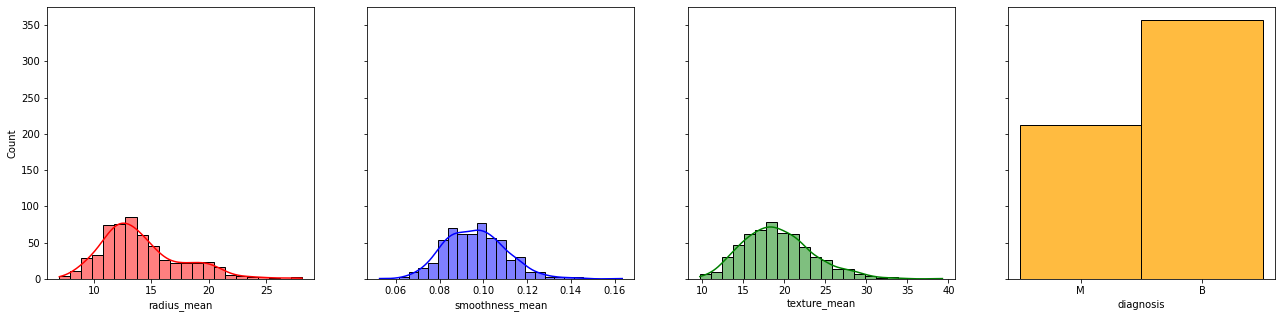

In [17]:
fig, axes = plt.subplots(1, 4, figsize =(22, 5), sharey=True)
sn.histplot(bc, ax=axes[0], x="radius_mean", kde=True, color="r")
sn.histplot(bc, ax=axes[1], x="smoothness_mean", kde=True, color="b")
sn.histplot(bc, ax=axes[2], x="texture_mean", kde=True, color="g")
sn.histplot(bc, ax=axes[3], x="diagnosis", color="orange")

<AxesSubplot:xlabel='texture_mean', ylabel='Percent'>

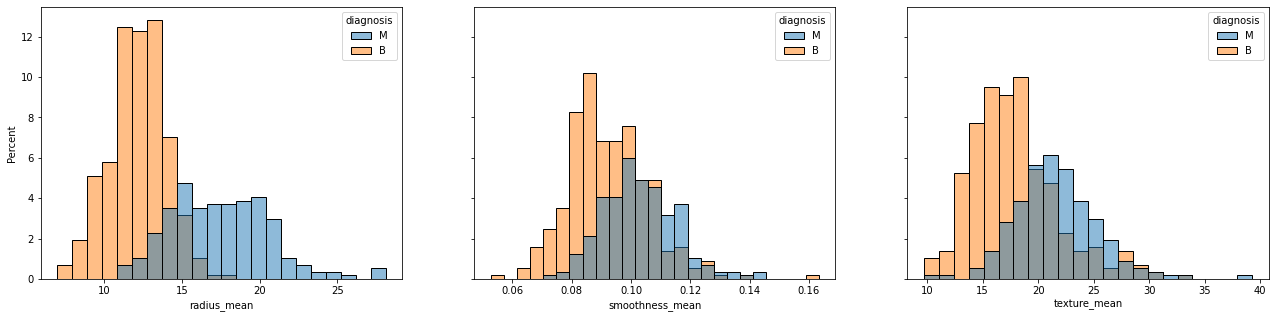

In [27]:
fig, axes = plt.subplots(1, 3, figsize =(22, 5), sharey=True)
sn.histplot(bc, ax=axes[0], x="radius_mean", hue="diagnosis", stat="percent", color="r")
sn.histplot(bc, ax=axes[1], x="smoothness_mean", hue="diagnosis", stat="percent", color="b")
sn.histplot(bc, ax=axes[2], x="texture_mean", hue="diagnosis", stat="percent", color="g")


### Model

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [29]:
X = bc.drop(["diagnosis"], axis = 1)
y = bc[["diagnosis"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [30]:
clf = GaussianNB()
clf.fit(x_train, y_train)

C:\Users\ssipikal\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Model predictions rating 

In [31]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.88      0.97      0.92        69
           M       0.95      0.80      0.87        45

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114



<AxesSubplot:title={'center':'Confusion matrix'}>

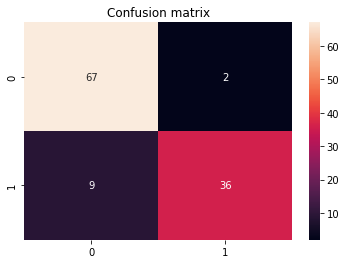

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
plt.title("Confusion matrix")
sn.heatmap(cm, annot=True)

GaussianNB()

### Most important features

<AxesSubplot:>

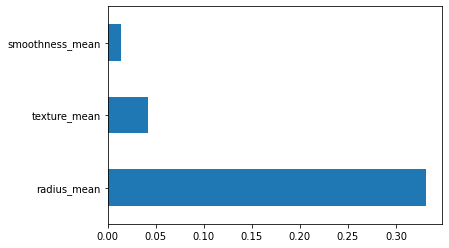

In [42]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(clf, x_test, y_test)
pd.Series(imps.importances_mean, index=X.columns).plot(kind='barh')   